In [ ]:
import numpy as np
from os import walk
import pandas as pd
from PIL import Image, ImageFilter, ImageOps

## Загрузка оригинальных файлов 

In [ ]:
img_dir = './orig/'
_, _, up = next(walk(img_dir + 'up'))
_, _, down = next(walk(img_dir + 'down'))
_, _, mov = next(walk(img_dir + 'mov'))
up = [img_dir + 'up/' + filename for filename in up]
down = [img_dir + 'down/' + filename for filename in down]
mov = [img_dir + 'mov/' + filename for filename in mov]

Вот так выглядят оригинальные изображения, выхваченные из видеопотока вебкамеры.

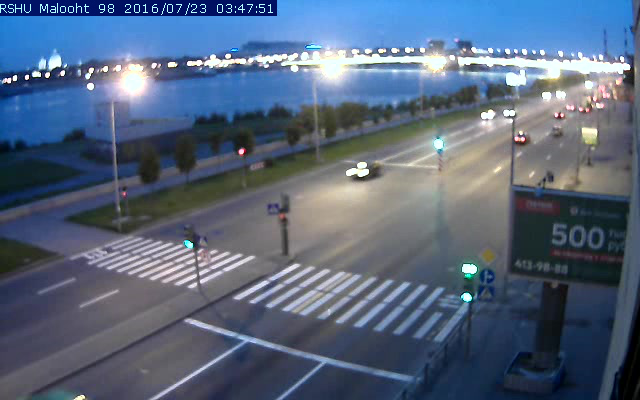

In [ ]:
Image.open(up[-1])

Чтобы снизить размерность задачи, обрежем изображения до фрагментов, вмещающих непосредственно разводящуюся часть моста, и переведём их в чёрно-белый формат. Получатся изображения 60x35 пикселей.

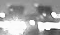

In [ ]:
img = Image.open(up[-1])
img = img.crop((420, 35, 480, 70))
img = img.convert('L')
img

In [ ]:
# конвертация изображений в массив
X = []
for img_path in up + down + mov:
    img = Image.open(img_path)
    img = img.crop((420, 35, 480, 70))
    img = img.convert('L')
    X.append(np.hstack(np.array(img)))
y = ['up']*len(up) + ['down']*len(down) + ['mov']*len(mov)
X = np.array(X)
y = np.array(y)

## Загрузка обработанных изображений

In [ ]:
# Папка с обработанными черно-белыми изображениями 
img_dir = './cropped/'
_, _, up = next(walk(img_dir + 'up'))
_, _, down = next(walk(img_dir + 'down'))
_, _, mov = next(walk(img_dir + 'mov'))
up = [img_dir + 'up/' + filename for filename in up]
down = [img_dir + 'down/' + filename for filename in down]
mov = [img_dir + 'mov/' + filename for filename in mov]

In [ ]:
# конвертация изображений в numpy-массив
X = []
for img_path in up + down + mov:
    img = Image.open(img_path)
    X.append(np.hstack(np.array(img)))
y = ['up']*len(up) + ['down']*len(down) + ['mov']*len(mov)
X = np.array(X)
y = np.array(y)